## Assignment: $k$ Means Clustering

### `! git clone https://www.github.com/ds4e/clustering`

### **Do Q1 and one other question.**

**Q1.** This is a question about clustering. We want to investigate how adjusting the "noisiness" of the data impacts the quality of the algorithm and the difficulty of picking $k$.

1. Run the code below, which creates four datasets: `df0_125`, `df0_25`, `df0_5`, `df1_0`, and `df2_0`. Each data set is created by increasing the amount of `noise` (standard deviation) around the cluster centers, from `0.125` to `0.25` to `0.5` to `1.0` to `2.0`.

```
import numpy as np
import pandas as pd

def createData(noise,N=50):
    np.random.seed(100) # Set the seed for replicability
    # Generate (x1,x2,g) triples:
    X1 = np.array([np.random.normal(1,noise,N),np.random.normal(1,noise,N)])
    X2 = np.array([np.random.normal(3,noise,N),np.random.normal(2,noise,N)])
    X3 = np.array([np.random.normal(5,noise,N),np.random.normal(3,noise,N)])
    # Concatenate into one data frame
    gdf1 = pd.DataFrame({'x1':X1[0,:],'x2':X1[1,:],'group':'a'})
    gdf2 = pd.DataFrame({'x1':X2[0,:],'x2':X2[1,:],'group':'b'})
    gdf3 = pd.DataFrame({'x1':X3[0,:],'x2':X3[1,:],'group':'c'})
    df = pd.concat([gdf1,gdf2,gdf3],axis=0)
    return df

df0_125 = createData(0.125)
df0_25 = createData(0.25)
df0_5 = createData(0.5)
df1_0 = createData(1.0)
df2_0 = createData(2.0)
```

2. Make scatterplots of the $(X1,X2)$ points by group for each of the datasets. As the `noise` goes up from 0.125 to 2.0, what happens to the visual distinctness of the clusters?
3. Create a scree plot for each of the datasets. Describe how the level of `noise` affects the scree plot (particularly the presence of a clear "elbow") and your ability to definitively select a $k$. (Pay attention to the vertical axis across plots, or put all the scree curves on a single canvas.)
4. Explain the intuition of the elbow, using this numerical simulation as an example.

In [4]:
#1
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

def createData(noise,N=50):
    np.random.seed(100) # Set the seed for replicability
    # Generate (x1,x2,g) triples:
    X1 = np.array([np.random.normal(1,noise,N),np.random.normal(1,noise,N)])
    X2 = np.array([np.random.normal(3,noise,N),np.random.normal(2,noise,N)])
    X3 = np.array([np.random.normal(5,noise,N),np.random.normal(3,noise,N)])
    # Concatenate into one data frame
    gdf1 = pd.DataFrame({'x1':X1[0,:],'x2':X1[1,:],'group':'a'})
    gdf2 = pd.DataFrame({'x1':X2[0,:],'x2':X2[1,:],'group':'b'})
    gdf3 = pd.DataFrame({'x1':X3[0,:],'x2':X3[1,:],'group':'c'})
    df = pd.concat([gdf1,gdf2,gdf3],axis=0)
    return df

df0_125 = createData(0.125)
df0_25 = createData(0.25)
df0_5 = createData(0.5)
df1_0 = createData(1.0)
df2_0 = createData(2.0)

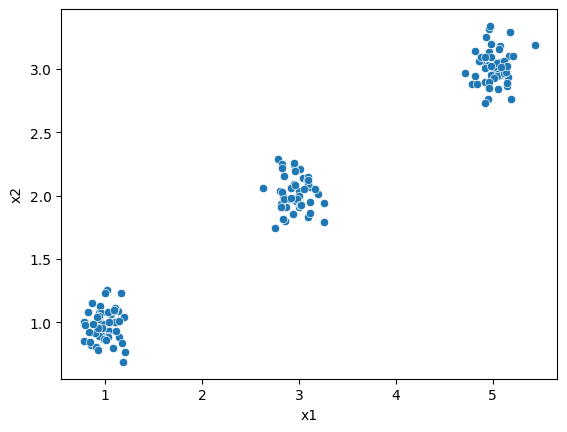

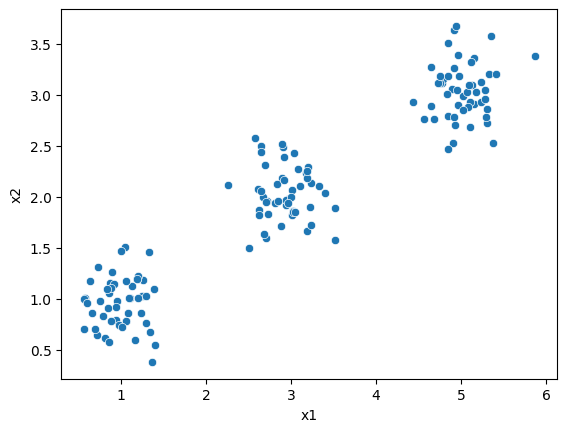

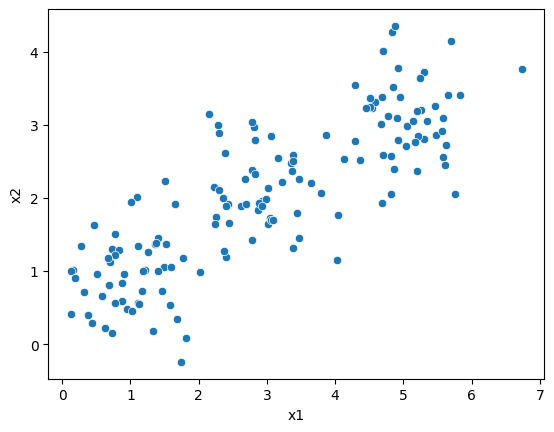

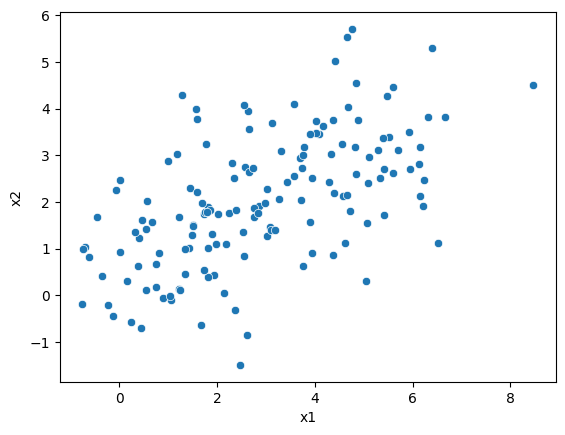

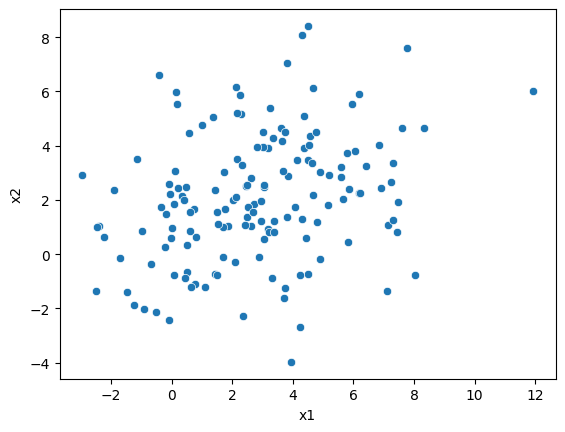

In [7]:

#2
this_plot = sns.scatterplot(x="x1", y="x2",data=df0_125)
plt.show()
this_plot = sns.scatterplot(x="x1", y="x2",data=df0_25)
plt.show()
this_plot = sns.scatterplot(x="x1", y="x2",data=df0_5)
plt.show()
this_plot = sns.scatterplot(x="x1", y="x2",data=df1_0)
plt.show()
this_plot = sns.scatterplot(x="x1", y="x2",data=df2_0)
plt.show()

#As the noise goes up, the clusters are less defined.
#The data points are spread out and are intertwined with one another.

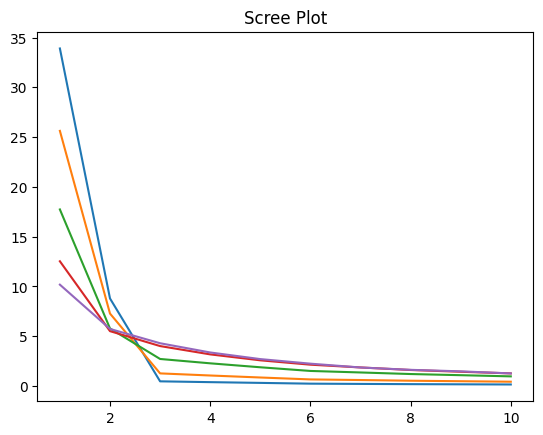

In [8]:
#3
from sklearn.cluster import KMeans

def maxmin(x):  # Fixed function
    return (x - x.min()) / (x.max() - x.min())

## Scree plot:
def scree_plot_kmeans(df):
  X = df[['x1', 'x2']]
  X = X.apply(maxmin)
  k_bar = 10
  SSE = [] # We'll store the training error here
  for k in range(k_bar): # For indices from 0 to k_bar-1
      model = KMeans(n_clusters=k+1, max_iter=300, n_init = 10, random_state=0) # Create a model for k
      model = model.fit(X) # Fit the model
      SSE.append(model.inertia_) # Record the sum of squared error for k in the SSE vector
  scree_plot = sns.lineplot(x=np.arange(1,k_bar+1), y=SSE).set_title('Scree Plot') # Create scree plot

scree_plot_kmeans(df0_125)
scree_plot_kmeans(df0_25)
scree_plot_kmeans(df0_5)
scree_plot_kmeans(df1_0)
scree_plot_kmeans(df2_0)

#As noise increases, there is less of a distinction in the elbow.
#The steepness of k-1 to k is less drastic than k to k+1.
#However, this does not necessarily affect my ability to select a k.
#There is a good distinction, although as the noise goes up, the k value went from 3 to 2.

#4 The elbow point is where the reduction in SSE from k-1 to k drops significantly from k to k+1. The most significant difference is in the first dataset where there is better clustering. Therefore the optimal k would be around 3 because it goes from very steep to an almost horizontal line. The other lines have a less steep line to begin with and grow to be only slihghtly less steeper.

**Q2.** This question is a case study on clustering.

1. Load the `2022 election cycle fundraising.csv` file in the `./data` folder. This has campaign finance data for the 2022 election for House and Senate candidates. We're going to focus on the total amount they raised, `Raised`, the total amount they spent, `Spent`, their available `Cash on Hand`, and their `Debts`. The variables denominated in dollars are messy and require cleaning. How do you handle it?
2. Max-min normalize `Raised` and `Spent`. Use a scree plot to determine the optimal number of clusters for the $k$ means clustering algorithm. Make a scatter plot of `Raised` against `Spent` and hue the dots by their cluster membership. What do you see? Which politicians comprise the smallest two clusters? If necessary, look up some of these races to see how close they were.
3. Repeat part 2, but for `Cash on Hand` and `Debts`. Compare your results with part 2. Why might this be? If necessary, look up some of these races to see how close they were.
4. Use $k$ means clustering with all four numeric variables. How do your results compare to the previous two parts?
5. Did the $k$-MC algorithm find useful patterns for you in analyzing the election?

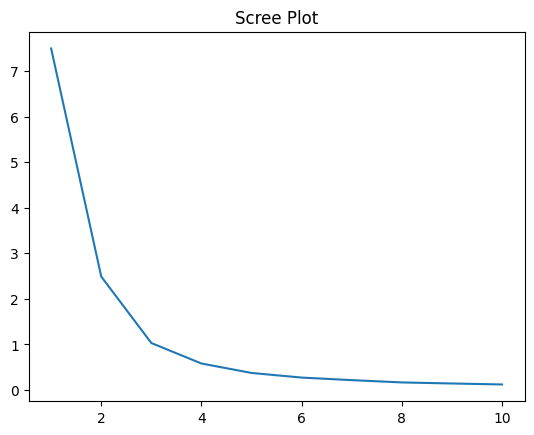

                     Member    Raised     Spent  Cluster
417         Raphael Warnock  86581469  75959810        1
340              Mark Kelly  73140886  61357281        1
523             Val Demings  64682883  58806664        1
2               Adam Schiff  20993041  13957854        2
261            John Kennedy  28119082  18276565        2
290            Katie Porter  21441693  15946876        2
89            Chuck Schumer  35899966  25944350        2
87   Catherine Cortez Masto  37993811  35928936        2
326           Maggie Hassan  30914830  28380992        2
298          Kevin McCarthy  24791538  22086344        2
357          Michael Bennet  18086343  13713611        2
328             Marco Rubio  36709285  30153111        2
390            Nancy Pelosi  22216583  21814643        2
402            Patty Murray  13377243  13073248        2
414               Rand Paul  22490627  15865010        2
115            Dan Crenshaw  14535870  14512435        2
442             Ron Johnson  27

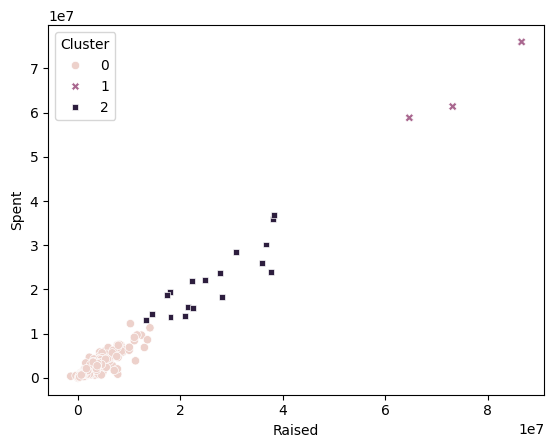

In [40]:
#1
df = pd.read_csv('clustering/assignment/data/2022 election cycle fundraising.csv', usecols=['Raised','Spent','Cash on Hand', 'Debts', 'Member'])

# Convert only the financial columns to integers
cols_to_convert = ['Raised', 'Spent', 'Cash on Hand', 'Debts']
df[cols_to_convert] = df[cols_to_convert].replace('[\$,]', '', regex=True).astype(int)

#2

from sklearn.cluster import KMeans # Import kmc

# Max-min scaler function:
def maxmin(x): # Max-min scaler function
    x = (x-min(x))/(max(x)-min(x))
    return x


# Preprocess the data for scikit:
X = df.loc[ : , ['Raised','Spent'] ] # Select data to cluster
X = X.apply(maxmin)

# Create a scree plot:
k_bar = 10
SSE = [] # We'll store the training error here
for k in range(k_bar): # For indices from 0 to k_bar-1
    model = KMeans(n_clusters=k+1, max_iter=300, n_init = 10, random_state=0) # Create a model for k
    model = model.fit(X) # Fit the model
    SSE.append(model.inertia_) # Record the sum of squared error for k in the SSE vector

scree_plot = sns.lineplot(x=np.arange(1,k_bar+1), y=SSE).set_title('Scree Plot') # Create scree plot
plt.show()


## Optimal clustering:
kstar = 3
# Fit K-Means model
model = KMeans(n_clusters=kstar, max_iter=300, n_init=10, random_state=0)
df['Cluster'] = model.fit_predict(X)  # Assign cluster membership
sns.scatterplot(data=df, x='Raised', y='Spent', hue='Cluster', style='Cluster')

# Count politicians in each cluster
cluster_counts = df['Cluster'].value_counts()
smallest_clusters = cluster_counts.nsmallest(2).index.tolist()

# Display politicians in the smallest two clusters
smallest_politicians = df[df['Cluster'].isin(smallest_clusters)]
print(smallest_politicians[['Member', 'Raised', 'Spent', 'Cluster']].sort_values(by='Cluster'))

#I see that cluster 3 is very far out from the rest of the data points and there are not many data points in that area.
#Most of the data is clustered around the bottom left, and the data becomes less tight as towards the upper right.





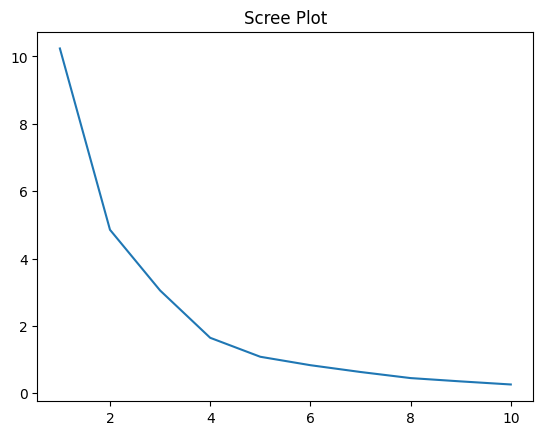

                  Member  Cash on Hand     Debts  Cluster
2            Adam Schiff      20942888         0        1
89         Chuck Schumer      20231213         0        1
261         John Kennedy      15530074         0        1
267           John Thune      17419927         0        1
290         Katie Porter      15762568         0        1
274      Josh Gottheimer      14024163         0        1
310       Lindsey Graham      13815515         0        1
340           Mark Kelly      13186127         0        1
417      Raphael Warnock      22762985         0        1
412  Raja Krishnamoorthi      11633394         0        1
500            Tim Scott      21539824         0        1
133          David Trone       6206371  13302000        2
442          Ron Johnson       4508581  11759857        2


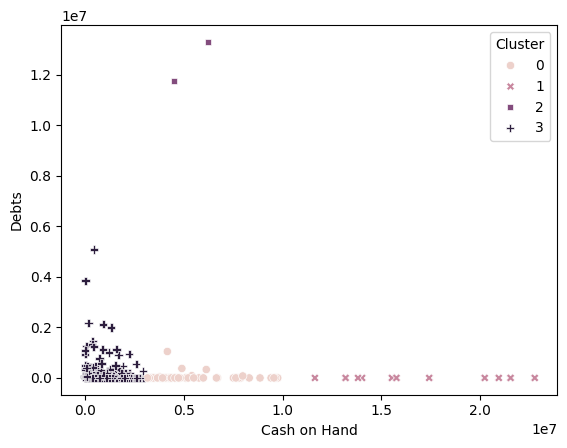

In [42]:
#3
# Preprocess the data for scikit:
X = df.loc[ : , ['Cash on Hand','Debts'] ] # Select data to cluster
X = X.apply(maxmin)

# Create a scree plot:
k_bar = 10
SSE = [] # We'll store the training error here
for k in range(k_bar): # For indices from 0 to k_bar-1
    model = KMeans(n_clusters=k+1, max_iter=300, n_init = 10, random_state=0) # Create a model for k
    model = model.fit(X) # Fit the model
    SSE.append(model.inertia_) # Record the sum of squared error for k in the SSE vector

scree_plot = sns.lineplot(x=np.arange(1,k_bar+1), y=SSE).set_title('Scree Plot') # Create scree plot
plt.show()


## Optimal clustering:
kstar = 4
# Fit K-Means model
model = KMeans(n_clusters=kstar, max_iter=300, n_init=10, random_state=0)
df['Cluster'] = model.fit_predict(X)  # Assign cluster membership
sns.scatterplot(data=df, x='Cash on Hand', y='Debts', hue='Cluster', style='Cluster')

# Count politicians in each cluster
cluster_counts = df['Cluster'].value_counts()
smallest_clusters = cluster_counts.nsmallest(2).index.tolist()

# Display politicians in the smallest two clusters
smallest_politicians = df[df['Cluster'].isin(smallest_clusters)]
print(smallest_politicians[['Member', 'Cash on Hand', 'Debts', 'Cluster']].sort_values(by='Cluster'))

#There is less of a linear relationship with this graph. More of the debts are concentrated with less cash on hand.
#This makes sense considering one would have to go into debt if they don't have enough money to help them with their campaigning.

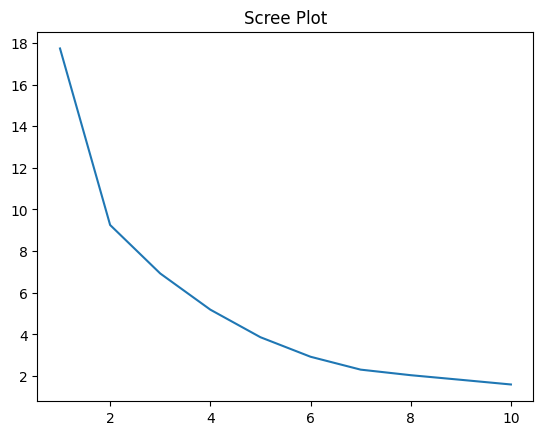

              Member    Raised     Spent  Cash on Hand     Debts  Cluster
133      David Trone  12990741   6878050       6206371  13302000        3
442      Ron Johnson  27680901  23731653       4508581  11759857        3
340       Mark Kelly  73140886  61357281      13186127         0        5
417  Raphael Warnock  86581469  75959810      22762985         0        5
523      Val Demings  64682883  58806664       6647641         0        5


In [48]:
#4
# Preprocess the data for scikit:
X = df.loc[ : , ['Raised', 'Spent', 'Cash on Hand', 'Debts'] ] # Select data to cluster
X = X.apply(maxmin)

# Create a scree plot:
k_bar = 10
SSE = [] # We'll store the training error here
for k in range(k_bar): # For indices from 0 to k_bar-1
    model = KMeans(n_clusters=k+1, max_iter=300, n_init = 10, random_state=0) # Create a model for k
    model = model.fit(X) # Fit the model
    SSE.append(model.inertia_) # Record the sum of squared error for k in the SSE vector

scree_plot = sns.lineplot(x=np.arange(1,k_bar+1), y=SSE).set_title('Scree Plot') # Create scree plot
plt.show()

# Select optimal k (from scree plot)
kstar = 7 # Adjust based on the scree plot elbow point

# Fit K-Means model with 4 variables
model = KMeans(n_clusters=kstar, max_iter=300, n_init=10, random_state=0)
df['Cluster'] = model.fit_predict(X)  # Assign cluster membership

# Count politicians in each cluster
cluster_counts = df['Cluster'].value_counts()
smallest_clusters = cluster_counts.nsmallest(2).index.tolist()

# Display politicians in the smallest two clusters
smallest_politicians = df[df['Cluster'].isin(smallest_clusters)]
print(smallest_politicians[['Member', 'Raised', 'Spent', 'Cash on Hand', 'Debts', 'Cluster']].sort_values(by='Cluster'))

#I am not able to plot all four variables on the same plot, but I was able to do the optimal k.
#Since there are so many variables and data to draw from, it would be ideal to have a higher optimal k.
#Although the most distinct difference is at 2, there would not be any meaningful relationship being shown with all the data
#because it will be difficult to see the correlations.
#At 7, there is a distinct difference, so I chose that one instead of 2.
#The people in the smallest groups are the ones in the extremes of the previous two scatterplots. This makes sense considering they are outliers and need to be in their own cluster.




#5 The K-MC helped me see correlations between the data and the members that specifically stood out. Moreover, it helps me understand what a normal amount to spend/raise/etc would be during an election. The distinctions between the clusters make me realize the different thresholds that distinguish members.

**Q3.** This question is a case study on clustering.

1. Load the `SIPRI Military Expenditure Database.csv` file in the `./data` folder. This has data about military spending by country. Filter the rows to select only the year 2020, and drop all rows with missing values. I ended up with 148 countries. Is any further cleaning of the variables required?
2. Max-min normalize `Spending (2020 USD)` and `Spending per Capita`. Use a scree plot to determine the optimal number of clusters for the $k$ means clustering algorithm. Make a scatter plot of `Spending (2020 USD)` and `Spending per Capita`, and hue the dots by their cluster membership. Compute a describe table conditional on cluster membership (i.e. `.groupby(cluster).describe()`). What do you see? Where is the United States? Do you notice any patterns in the cluster membership?
3. Repeat part 2 for `Percent of Government Spending` and `Percent of GDP`. How do your results compare to part 2?
4. Use $k$ means clustering with all four numeric variables: `Spending (2020 USD)`, `Spending per Capita`, `Percent of Government Spending`, and `Percent of GDP`. How do your results compare to the previous two parts?
5. Did the $k$-MC algorithm find any useful patterns for you in analyzing the election?

**Q4.** This question is a case study for $k$ means clustering.

1. Load the `airbnb_hw.csv` data. Clean `Price` along with `Beds`, `Number of Reviews`, and `Review Scores Rating`.
2. Maxmin normalize the data and remove any `nan`'s (`KMeans` from `sklearn` doesn't accept `nan` input).
3. Use `sklearn`'s `KMeans` module to cluster the data by `Beds`, `Number of Reviews`, and `Review Scores Rating` for `k=6`.
4. Use `seaborn`'s `.pairplot()` to make a grid of scatterplots that show how the clustering is carried out in multiple dimensions.
5. Use `.groupby` and `.describe` to compute the average price for each cluster. Which clusters have the highest rental prices?
6. Use a scree plot to pick the number of clusters and repeat steps 4 and 5.

**Q5.** We looked at computer vision with $k$NN in a previous question. Can $k$ means clustering correctly group digits, even if we don't know which symbols are which?

1. To load the data, run the following code in a chunk:
```
from keras.datasets import mnist
df = mnist.load_data('minst.db')
train,test = df
X_train, y_train = train
X_test, y_test = test
```
The `y_test` and `y_train` vectors, for each index `i`, tell you want number is written in the corresponding index in `X_train[i]` and `X_test[i]`. The value of `X_train[i]` and `X_test[i]`, however, is a 28$\times$28 array whose entries contain values between 0 and 256. Each element of the matrix is essentially a "pixel" and the matrix encodes a representation of a number. To visualize this, run the following code to see the first ten numbers:
```
import matplotlib.pyplot as plt
import numpy as np
np.set_printoptions(edgeitems=30, linewidth=100000)
for i in range(5):
    print(y_test[i],'\n') # Print the label
    print(X_test[i],'\n') # Print the matrix of values
    plt.contourf(np.rot90(X_test[i].transpose())) # Make a contour plot of the matrix values
    plt.show()
```
OK, those are the data: Labels attached to handwritten digits encoded as a matrix.

2. What is the shape of `X_train` and `X_test`? What is the shape of `X_train[i]` and `X_test[i]` for each index `i`? What is the shape of `y_train` and `y_test`?
3. Use Numpy's `.reshape()` method to covert the training and testing data from a matrix into an vector of features. So, `X_test[index].reshape((1,784))` will convert the $index$-th element of `X_test` into a $28\times 28=784$-length row vector of values, rather than a matrix. Turn `X_train` into an $N \times 784$ matrix $X$ that is suitable for scikit-learn's kNN classifier where $N$ is the number of observations and $784=28*28$ (you could use, for example, a `for` loop).
4. Use $k$ means clustering on the reshaped `X_test` data with `k=10`.  
5. Cross tabulate the cluster assignments with the true labels for the test set values. How good is the correspondence? What proportion of digits are clustered correctly? Which digits are the hardest to distinguish from one another? Can $k$MC recover the latent digits 0 to 9, without even knowing what those digits were?
6. If you use a scree plot to determine the number of clusters $k$, does it pick 10 (the true number of digits), or not? If it fails to pick $k=10$, which digits does it tend to combine into the same classification?